In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
import seaborn as sns

df = pd.read_csv('AirQualityUCI.csv')
df.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [2]:
df.shape

(9357, 16)

In [3]:
df.columns

Index(['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT',
       'PT08_S2_NMHC', 'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2',
       'PT08_S5_O3', 'T', 'RH', 'AH', 'CO_level'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9357 non-null   object 
 1   Time          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   int64  
 4   NMHC_GT       9357 non-null   int64  
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   int64  
 7   Nox_GT        9357 non-null   int64  
 8   PT08_S3_Nox   9357 non-null   int64  
 9   NO2_GT        9357 non-null   int64  
 10  PT08_S4_NO2   9357 non-null   int64  
 11  PT08_S5_O3    9357 non-null   int64  
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
 15  CO_level      9357 non-null   object 
dtypes: float64(5), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

#### Data Preprocessing

In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

print("Numeric columns:")
print(numeric_df.columns.tolist())

Numeric columns:
['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC', 'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH']


In [7]:
# Compute correlation matrix
corr = numeric_df.corr()
corr

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
CO_GT,1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892
PT08_S1_CO,0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903
NMHC_GT,0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500
C6H6_GT,-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555
PT08_S2_NMHC,0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572
Nox_GT,0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847
PT08_S3_Nox,-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618
NO2_GT,0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440
PT08_S4_NO2,-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913
PT08_S5_O3,0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467


###### Observation: The correlation matrix shows that there are strong relationships among many sensor-related features and humidity-related features such as RH and AH. This shows redundancy in the dataset, so feature selection through PCA will help us avoid over-weighted information of correlated features in our K-Means clustering.

#### Feature Selection

In [8]:
# Standardize the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# Run PCA 
pca = PCA(n_components=5)
pca.fit(X_scaled)

# PCA loadings (feature contributions)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(5)],
    index=numeric_df.columns
)

print("PCA (feature contributions to each principal component):")
print(loadings)


PCA (feature contributions to each principal component):
                   PC1       PC2       PC3       PC4       PC5
CO_GT        -0.004102  0.361869  0.528427  0.060886  0.705109
PT08_S1_CO    0.363754  0.141825 -0.142422  0.054129 -0.031213
NMHC_GT       0.038280  0.076563  0.044157  0.961507 -0.179993
C6H6_GT       0.380572 -0.079817  0.104669 -0.053103 -0.040484
PT08_S2_NMHC  0.337777  0.196226 -0.260650  0.007252  0.108227
Nox_GT        0.037320  0.527856  0.112936 -0.173678 -0.425152
PT08_S3_Nox   0.143070 -0.380496  0.501695  0.064124 -0.201629
NO2_GT        0.016872  0.482840  0.365940 -0.042487 -0.261363
PT08_S4_NO2   0.337443  0.035878 -0.232305  0.121380  0.353965
PT08_S5_O3    0.298611  0.275625 -0.282819 -0.025171 -0.069036
T             0.361022 -0.154940  0.140758 -0.061003  0.079774
RH            0.346578 -0.136084  0.176573 -0.079799 -0.161568
AH            0.362817 -0.147896  0.190604 -0.066767 -0.062075


###### I used PCA loadings to select features that contribute most to the variance in the dataset.
###### I observed that CO(GT), NO2(GT), NOx(GT), C6H6(GT), NMHC(GT), PT08.S5(O3) and Temperature showed the high influence across the first five principal components (PC1 to PC5).These variables represent different pollutant groups and atmospheric conditions, which make them appropriate for clustering air-quality.

In [9]:
# Select the 7 features we decided on

features = [
    "CO_GT",      
    "NO2_GT",     
    "Nox_GT",     
    "C6H6_GT",    
    "NMHC_GT",    
    "PT08_S5_O3", 
    "T"           
]

X = df[features].copy()
print("Selected features shape:", X.shape)
print("First 5 rows of selected features:", X.head())

Selected features shape: (9357, 7)
First 5 rows of selected features:    CO_GT  NO2_GT  Nox_GT  C6H6_GT  NMHC_GT  PT08_S5_O3     T
0   11.9     220    1389     50.6     -200        2342  12.4
1   11.5     190    1358     49.4     -200        2237  11.5
2   10.2     192     748     47.7     -200        2452  13.7
3   10.2     227    1369     49.5     -200        2386  13.2
4   10.1     255    1389     45.2     -200        2465  15.5


In [12]:
# Scaling (StandardScaler)

scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)           
X_scaled = pd.DataFrame(X_scaled_array, columns=features, index=X.index)

print("Scaled features shape:", X_scaled.shape)
print("First 5 rows of scaled features:\n", X_scaled.head())

Scaled features shape: (9357, 7)
First 5 rows of scaled features:
       CO_GT    NO2_GT    Nox_GT   C6H6_GT  NMHC_GT  PT08_S5_O3         T
0  0.593763  1.275084  4.740822  1.177783 -0.29267    2.991654  0.060686
1  0.588612  1.038740  4.620397  1.148782 -0.29267    2.761851  0.039853
2  0.571871  1.054497  2.250729  1.107698 -0.29267    3.232400  0.090777
3  0.571871  1.330231  4.663128  1.151199 -0.29267    3.087952  0.079203
4  0.570583  1.550819  4.740822  1.047279 -0.29267    3.260852  0.132443


###### Why Scaling?
###### K-Means is distance-based. So, the features with larger numerical ranges often dominate. When we scale them, it brings all features to the same scale. So, I scaled all selected features using StandardScaler so that each variable contributes equally to the clustering. Without scaling, the clusters would be biased and inaccurate.

### Exploratory Data Analysis

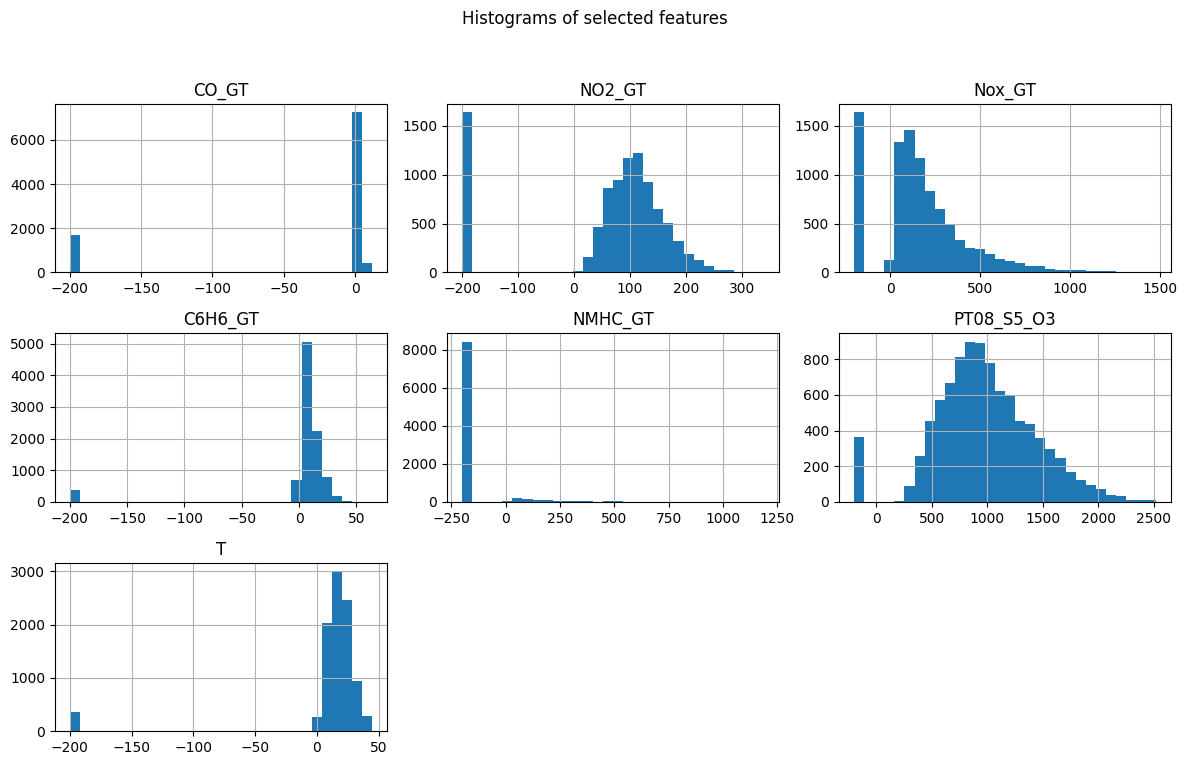

In [13]:
# Histograms (to see distribution)

X.hist(bins=30, figsize=(12,8))
plt.suptitle("Histograms of selected features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


###### In the histograms, I observed that there many values filled with –200 in several features such as CO_GT, NO2_GT, Nox_GT, C6H6_GT, NMHC_GT, and T. This tells us that the dataset definitely contains missing-value indicators, even though isna() returned zero. I think -200 is a kind of encoded numeric value used to fill the missing values.


Correlation matrix:             CO_GT  NO2_GT  Nox_GT  C6H6_GT  NMHC_GT  PT08_S5_O3      T
CO_GT       1.000   0.671   0.526   -0.031    0.128       0.080 -0.069
NO2_GT      0.671   1.000   0.817   -0.011    0.103       0.253 -0.084
Nox_GT      0.526   0.817   1.000   -0.001   -0.004       0.462 -0.138
C6H6_GT    -0.031  -0.011  -0.001    1.000    0.037       0.641  0.971
NMHC_GT     0.128   0.103  -0.004    0.037    1.000       0.101 -0.000
PT08_S5_O3  0.080   0.253   0.462    0.641    0.101       1.000  0.504
T          -0.069  -0.084  -0.138    0.971   -0.000       0.504  1.000


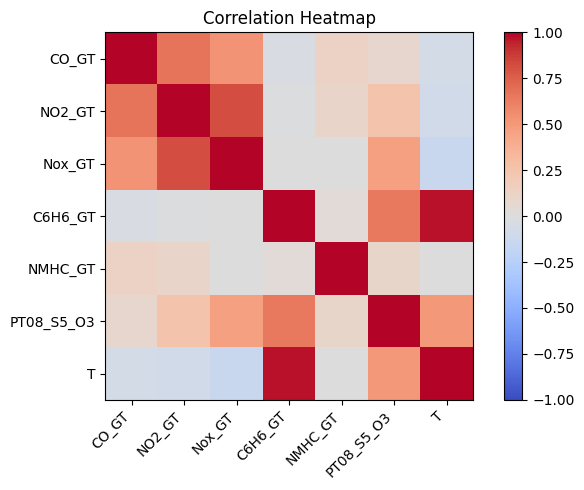

In [14]:
corr = X.corr()
print("Correlation matrix:", corr.round(3))

# Heatmap (matplotlib)
plt.figure(figsize=(7,5))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(features)), features, rotation=45, ha='right')
plt.yticks(range(len(features)), features)
plt.tight_layout()
plt.show()

### Data Cleaning (after detecting strange missing values in histograms, filled wtih -200)

In [15]:
df = pd.read_csv("AirQualityUCI.csv")

# Clean missing values
df = df.replace(-200, np.nan)
df = df.fillna(df.median(numeric_only=True))

print(df.isna().sum())  

Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64


In [16]:
# Re-create features with the same 7 selected features

features = ["CO_GT", "NO2_GT", "Nox_GT", "C6H6_GT", "NMHC_GT", "PT08_S5_O3", "T"]
X = df[features]
print(X.head())

   CO_GT  NO2_GT  Nox_GT  C6H6_GT  NMHC_GT  PT08_S5_O3     T
0   11.9   220.0  1389.0     50.6    150.0      2342.0  12.4
1   11.5   190.0  1358.0     49.4    150.0      2237.0  11.5
2   10.2   192.0   748.0     47.7    150.0      2452.0  13.7
3   10.2   227.0  1369.0     49.5    150.0      2386.0  13.2
4   10.1   255.0  1389.0     45.2    150.0      2465.0  15.5


In [17]:
# Re-scale the cleaned features (StandardScaler)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=features)

print(X_scaled.head())

      CO_GT    NO2_GT    Nox_GT   C6H6_GT   NMHC_GT  PT08_S5_O3         T
0  7.415754  2.449057  5.914587  5.551695 -0.100241    3.381675 -0.681189
1  7.113400  1.766404  5.755678  5.387567 -0.100241    3.112971 -0.785142
2  6.130750  1.811914  2.628765  5.155053 -0.100241    3.663175 -0.531035
3  6.130750  2.608343  5.812065  5.401245 -0.100241    3.494275 -0.588787
4  6.055162  3.245486  5.914587  4.813120 -0.100241    3.696443 -0.323129


### Clustering & Choosing the optimal number K

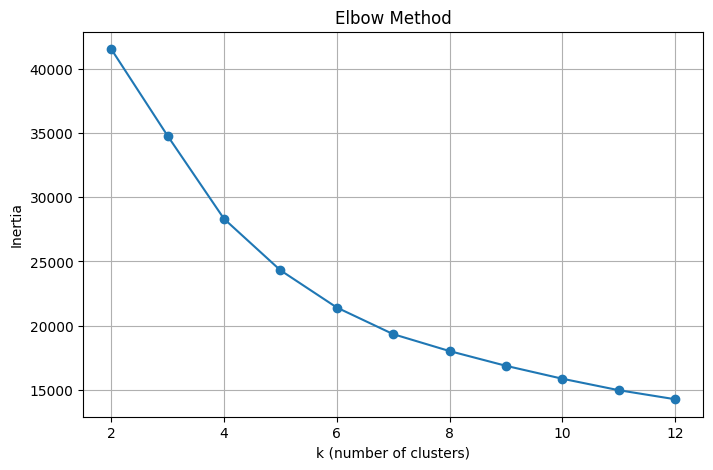

In [18]:
# Elbow Method (Plot inertia vs k)

inertias = []
K_range = range(2, 13)  # check k = 2 to 12

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


##### Elbow Method

###### In the graph, we observed that there is strong drop from k=2 to k=3, and then to k=4. But don't see a sharp elbow, so it means that inertia gradually decreases.However, the curve begins to “bend” around k = 3. Therefore, k=3 would be more ideal than k=2.


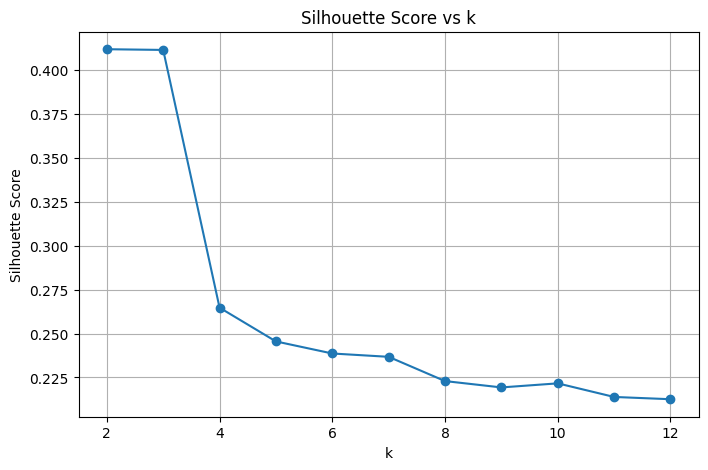

Silhouette scores: [0.41173506527169285, 0.41133310270089335, 0.2646934331019307, 0.24549454301191215, 0.23862548437348324, 0.23673434931700066, 0.22293160994294786, 0.21932265900540793, 0.22163909169525456, 0.21390310965013765, 0.2126111683477825]


In [19]:
# Silhouette Score (Check How well clusters separate)

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

print("Silhouette scores:", silhouette_scores)


##### Silhouette Score

###### Based on the silhouette scores, I observed that after k=3, silhouette drops dramatically. so, k=2 gives the absolute best separation. k=3 is almost identical but gives more cluster detail. So, I think k=3 is ideal for the model.

### Fitting KMeans model with K

In [20]:
# Fit KMeans with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
labels = kmeans.fit_predict(X_scaled)


In [21]:
# Show counts per cluster
import numpy as np
counts = np.bincount(labels)
for i, c in enumerate(counts):
    print(f"Cluster {i}: {c} samples")

Cluster 0: 174 samples
Cluster 1: 2423 samples
Cluster 2: 6760 samples


In [22]:
df["cluster"] = labels
df.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level,cluster
0,11/23/2004,19:00:00,11.9,2008.0,150.0,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,Very High,1
1,11/23/2004,20:00:00,11.5,1918.0,150.0,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,Very High,1
2,11/17/2004,18:00:00,10.2,1802.0,150.0,47.7,1924.0,748.0,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244,Very High,1
3,11/23/2004,18:00:00,10.2,1982.0,150.0,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,Very High,1
4,11/26/2004,18:00:00,10.1,1956.0,150.0,45.2,1877.0,1389.0,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,Very High,1


In [23]:
# Get cluster centers (scaled)
centers_scaled = kmeans.cluster_centers_

# Convert back to original feature units
centers_original = scaler.inverse_transform(centers_scaled)

# Create DataFrame
centers_df = pd.DataFrame(centers_original, columns=features)

centers_df

,CO_GT,NO2_GT,Nox_GT,C6H6_GT,NMHC_GT,PT08_S5_O3,T
0,4.349425,134.500000,249.626437,21.278736,575.752874,1516.735632,18.261494
1,3.600082,158.214726,470.943233,18.301892,153.178116,1487.976964,17.187577
2,1.487115,95.298282,149.921653,6.733412,147.198904,839.488004,18.698149


C:\Users\hp\AppData\Local\Temp\ipykernel_4328\1513462143.py:12: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


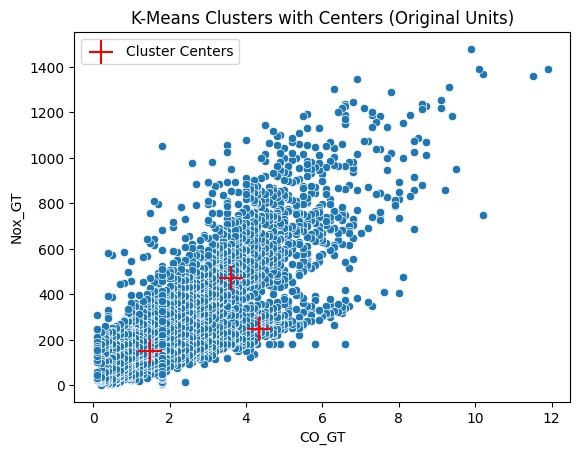

In [24]:
# Choose features to plot
x_feature = "CO_GT"
y_feature = "Nox_GT"

# Plot data points (original units)
sns.scatterplot(
    x=X[x_feature],
    y=X[y_feature]
)

# Plot cluster centers (original units)
plt.scatter(
    centers_df[x_feature],
    centers_df[y_feature],
    marker="+",
    s=300,
    c="red",
    edgecolor="black",
    label="Cluster Centers"
)

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("K-Means Clusters with Centers (Original Units)")
plt.legend()
plt.show()


### Saving Model and Scaler

In [25]:
# Save the trained KMeans model
joblib.dump(kmeans, "kmeans_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [26]:
# Save the clean dataset

df.to_csv("AirQuality_clean.csv", index=False)